Visualization code is based on the following post: 
http://tiao.io/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

#from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from functools import partial

import math
import random

## The loss function

In [29]:
def f(x, y):
    return (x*y-1)**2
    #return ((x-0.5)*(y-1)-1)**2

## Grid intialization

In [30]:
xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

### 3D Surface Plot

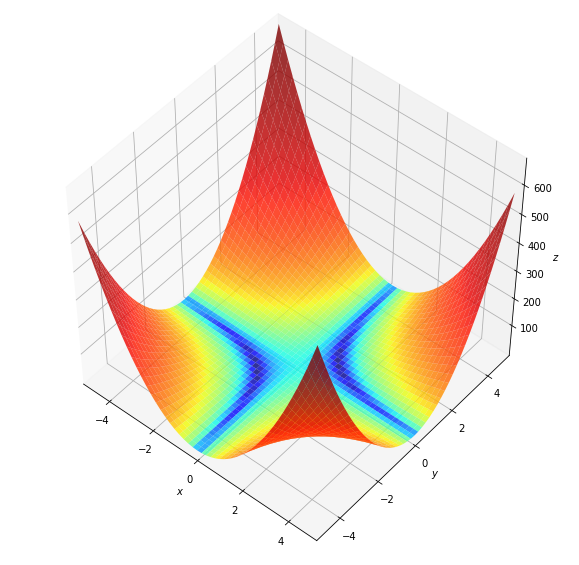

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

### 2D Contour Plot and Gradient Vector Field

In [32]:
def grad(x,y):
    dx = 2*y*(x*y-1)
    dy = 2*x*(x*y-1)
#    dx = 2*(y-1)*((x-0.5)*(y-1) -1)
#    dy = 2*(x-0.5)*((x-0.5)*(y-1)-1)
    return (dx,dy)

dz_dx, dz_dy=grad(x,y)

We can also use [autograd](https://github.com/HIPS/autograd) to compute the gradient vector field, and plot it with Matplotlib's [quiver](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.quiver) method.

In [33]:
#dz_dx = elementwise_grad(f, argnum=0)(x, y)
#dz_dy = elementwise_grad(f, argnum=1)(x, y)

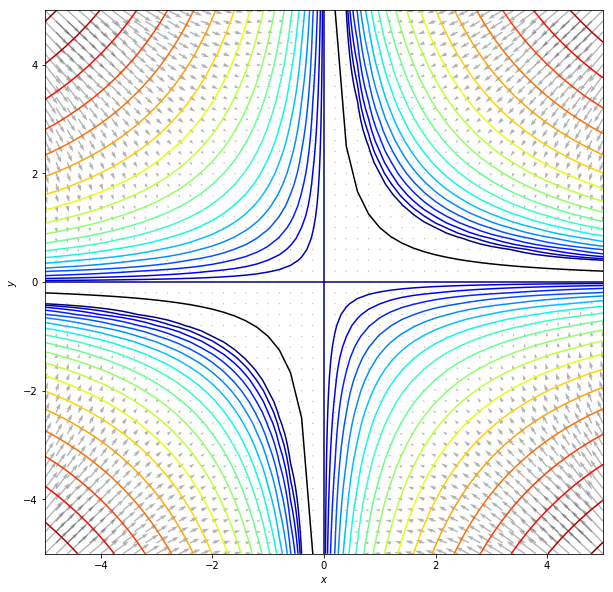

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=0.3)
ax.plot(np.arange(xmin, 0, xstep), 1./np.arange(xmin, 0, xstep), '-k')
ax.plot(np.arange(xstep, xmax + xstep, xstep), 1./np.arange(xstep, xmax + xstep, xstep), '-k')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [256]:
def init_weights(init_range):
    x_t= random.uniform(-init_range, init_range)
    y_t= random.uniform(-init_range, init_range)
    return (x_t, y_t)

def learning_rate(lr0, lr_min, lr_policy, t, xt, yt, rampup=0):
    lr=lr0
    if (lr_policy == 'decay'):
        lr = lr0 / math.sqrt(1. + t)
    elif (lr_policy == 'opt'):
        n=xt*xt + yt*yt
        d=(xt*yt - 1) * xt*yt
        eps= 0.000001
        if abs(d) < eps :
             d=sign(d)*eps
             lr = 0.25
        else:
            if n*n > 8*d:
                lr=(n - math.sqrt(n*n - 8*d))/(8*d)
            else:
                lr=n/(8*d)
    
    lr = lr0*max(abs(lr), lr_min)
    
    if (rampup > 0) and (t < rampup):
        lr = min(lr, lr0  * (t / rampup))
    
    return lr

def plot_loss(loss):
    T = loss.size
    max_loss = np.nanmax(loss)
    t = np.arange(0, T, 1)
    # Now we are using the Qt4Agg backend open an interactive plot window
    plt.figure(figsize=(10,6))
    plt.plot(t, loss)
    plt.axis([0., T+1, 0., max_loss+0.1])
    plt.grid(True)
    plt.ylabel('Loss')
    plt.xlabel('Iteration')

# Define training parameters

In [644]:
N=200

lr_min=0.00001

lr0 = 2.0  #0.1
lr_policy = 'decay'#'opt'

grad_noise = 4.5 #1.0 #5

rampup = 0
larc =   True # False # 
eta  = 0.05
larc_epsilon=0.1

momentum = 0. #9 #
wd=0. #0005 #0.001

init_range= 0.1

## Start Training

0  xt= 0.005  l_x= 0.1
0  yt= -0.02  l_y= 0.1
1  xt= -0.012438722922539284  l_x= 0.1
1  yt= -0.013356299806279755  l_y= 0.1
2  xt= -0.0303892557079446  l_x= 0.1
2  yt= -0.03722564500708957  l_y= 0.1
3  xt= -0.07905916709595905  l_x= 0.1
3  yt= -0.05538056279441514  l_y= 0.1
4  xt= -0.12622028621066184  l_x= 0.1
4  yt= -0.08022779778325265  l_y= 0.1
5  xt= -0.061160733743091875  l_x= 0.1
5  yt= -0.13820991479378666  l_y= 0.1
6  xt= -0.09572302529062088  l_x= 0.1
6  yt= -0.23182405890887  l_y= 0.1
7  xt= -0.31072144197784896  l_x= 0.1
7  yt= -0.3380576759073982  l_y= 0.1
8  xt= -0.0319509263464704  l_x= 0.1
8  yt= -0.2283864622977752  l_y= 0.1
9  xt= -0.04547457580997505  l_x= 0.1
9  yt= -0.26207245619235253  l_y= 0.1
10  xt= -0.11975602387557205  l_x= 0.1
10  yt= -0.22658692619990478  l_y= 0.1
11  xt= -0.28122190491250504  l_x= 0.10651182913136958
11  yt= -0.20890764573354556  l_y= 0.1
12  xt= -0.2649855506621796  l_x= 0.1
12  yt= -0.15402435925283825  l_y= 0.24098088554648234
13  xt= -

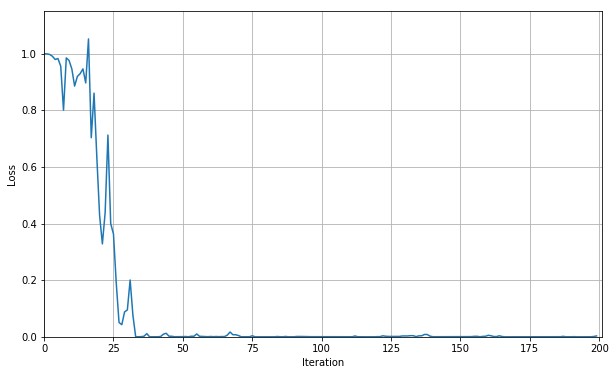

In [645]:
p=np.zeros((N,3), dtype=float)
xt,yt = init_weights(init_range) 
xt, yt = 0.005, -0.02

p[0,:]=[xt, yt, f(xt,yt)]
m_x=0
m_y=0
for t in range(0, N-1):
    lr=learning_rate(lr0, lr_min, lr_policy, t, xt, yt, rampup)

    dx,dy= grad(xt,yt)
    if grad_noise > 0.0 :
        dx += grad_noise * abs(dx) * random.uniform(-1, 1)
        dy += grad_noise * abs(dy) * random.uniform(-1, 1)

    if wd > 0.0 :
        dx += wd*xt
        dy += wd*yt

    #print (dx,dy)

    if larc:
        #if (abs(xt) > larc_epsilon):
        #if (abs(dx) > larc_epsilon):
        if abs(dx) > abs(xt)*eta:
                local_lr=max(larc_epsilon, abs(xt)* eta / abs(dx))
                print(t, " xt=", xt, " l_x=", local_lr)
                dx = dx * local_lr
                
        #if (abs(yt) > larc_epsilon):
        #if (abs(dy) > larc_epsilon):
        if abs(dy) > abs(yt)*eta :
                local_lr=max(larc_epsilon, abs(yt) * eta / abs(dy))
                print (t, " yt=", yt, " l_y=", local_lr)
                dy = dy * local_lr             

    if (momentum>0):
        m_x = momentum*m_x + (1-momentum)*dx
        m_y = momentum*m_y + (1-momentum)*dy
        dx=m_x
        dy=m_y
    
    
    #print (dx,dy)
    xt = xt - lr*dx
    yt = yt - lr*dy

    p[t+1,:] = [xt, yt, f(xt,yt)]

# print( p )
loss=p[:,2]
# print loss
plot_loss(loss)

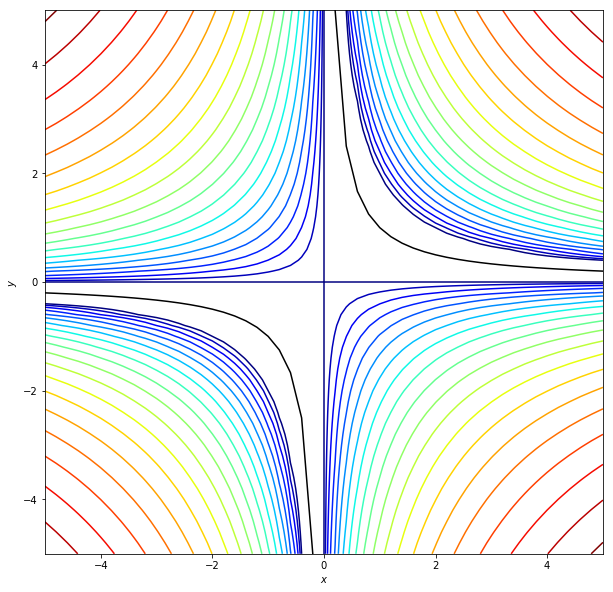

In [646]:
fig, ax = plt.subplots(figsize=(10, 10))

path = p[:,:2].T

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(np.arange(xmin, 0, xstep), 1./ np.arange(xmin, 0, xstep), '-k')
ax.plot(np.arange(xstep, xmax + xstep, xstep), 1./np.arange(xstep, xmax + xstep, xstep), '-k')

line, = ax.plot([], [], 'b')
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))


def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)


In [647]:
HTML(anim.to_html5_video())